# IMPORT LIBRARIES

In [21]:
# Basic Operation
import pandas as pd
import numpy as np

# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import string
import re


from sklearn.model_selection import train_test_split # Split Data 
from imblearn.over_sampling import SMOTE # Handling Imbalanced

# Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC


from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics  


# Data Visualization 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from termcolor import cprint
import seaborn as sns
import warnings   


warnings.filterwarnings('ignore')
%matplotlib inline

import os

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load The Data

In [3]:
df= pd.read_csv('e-ticaret_urun_yorumlari.csv',delimiter=';')
df.head()

,Metin,Durum
0,evet anlatıldığı gibi,1
1,Daha öncede almıştım bu cihazdan ense ve sakal...,1
2,Ürün gayet başarılı sakal kesmede başlık sayıs...,1
3,Daha öncede aynısını almıştım çok güzel ve kal...,1
4,Erkek kuaförüyüm ense ve sıfır sakal traşı içi...,1


# EDA Part

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15170 entries, 0 to 15169
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Metin   15170 non-null  object
 1   Durum   15170 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 237.2+ KB


In [5]:
df.describe()

,Durum
count,15170.000000
mean,0.631839
std,0.645211
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,2.000000


In [6]:
df.shape

(15170, 2)

# Now Check Nan value in our dataset

In [7]:
df.isnull().sum()

Metin    0
Durum    0
dtype: int64

# DATA VISUALIZATION



Total number of sentiments of comments :
0    6978
1    6799
2    1393
Name: Durum, dtype: int64


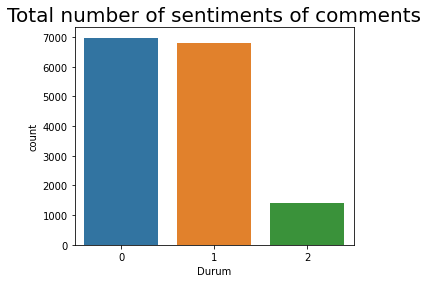

In [11]:
cprint("Total number of sentiments of comments :",'green')
print(df.Durum.value_counts())
plt.figure(figsize = (5, 4))
ax = sns.countplot(x = 'Durum', data = df)
ax.set_title(label = 'Total number of sentiments of comments', fontsize = 20)
plt.show()
#0: olumsuz, 1: olumlu, 2: nötr

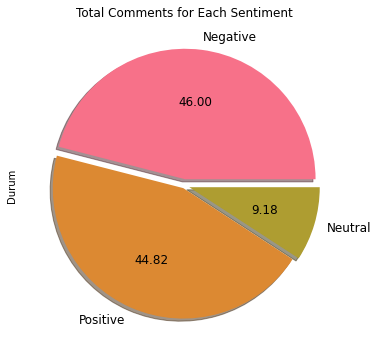

In [14]:
ax.set_title(label = 'Total number of sentiments of comments:')
colors=sns.color_palette('husl',10)
pd.Series(df['Durum']).value_counts().plot(kind='pie',colors=colors,labels=['Negative','Positive','Neutral'],explode=[0.05,0.02,0.04],shadow=True,autopct='%.2f',fontsize=12,figsize=(6,6),title="Total Comments for Each Sentiment")

plt.show()

# Split Text Of Sentiments

In [16]:
positive=df[df['Durum']== 1].Metin
neutral=df[df['Durum']== 2].Metin
negative=df[df['Durum']==0].Metin

# Word Cloud of Positive Sentiments

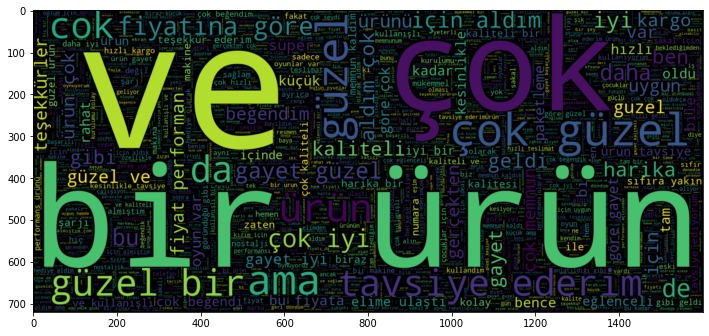

In [17]:
plt.figure(figsize=(12,10))
world_cloud_postive=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate("".join(positive))
plt.imshow(world_cloud_postive,interpolation='bilinear')
ax.grid(False)

# Word could of Negative sentiments

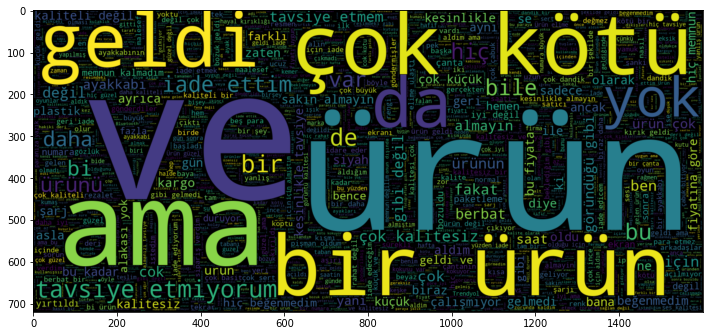

In [18]:
plt.figure(figsize = (12,10)) 
worldcould_neg = WordCloud(min_font_size = 3,max_words = 3200,width = 1600,height = 720).generate(" ".join(negative))
plt.imshow(worldcould_neg,interpolation = 'bilinear')
ax.grid(False)

# TEXT PREPROCESSING AND CLEANING

In [22]:
# Remove stop words
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('turkish'))])
    return text

# Remove url  
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Remove punct
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


# combaine negative reason with  tweet (if exsist)
df['final_text'] = df['Metin'] 


# Apply functions on tweets
df['final_text'] = df['final_text'].apply(lambda x : remove_url(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_emoji(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_punct(x))
df['final_text'] = df['final_text'].apply(lambda x : x.lower())
df['final_text'] = df['final_text'].apply(lambda x : remove_stopwords(x))

In [23]:
# result
df['final_text']

0                                         evet anlatıldığı
1        öncede almıştım cihazdan ense sakal tüketmek o...
2        ürün gayet başarılı sakal kesmede başlık sayıs...
3         öncede aynısını almıştım güzel kaliteli bir ürün
4        erkek kuaförüyüm ense sıfır sakal traşı uygun ...
                               ...                        
15165                                ışık seviyesi rezalet
15166    hic begenmedim aydinlatma hic yok kapattigimda...
15167            2 gün sonra hoparlörü bozuldu kullanışsız
15168    aşırı boğuk bir sesi rengi var kumanda hemen b...
15169           kumanda kalitesiz verdiğiniz paraya değmez
Name: final_text, Length: 15170, dtype: object

In [33]:
filtervalue = [0,1]
df = df[df.Durum.isin(filtervalue)]
df.reset_index(drop=True)

,Metin,Durum,final_text
0,evet anlatıldığı gibi,1,evet anlatıldığı
1,Daha öncede almıştım bu cihazdan ense ve sakal...,1,öncede almıştım cihazdan ense sakal tüketmek o...
2,Ürün gayet başarılı sakal kesmede başlık sayıs...,1,ürün gayet başarılı sakal kesmede başlık sayıs...
3,Daha öncede aynısını almıştım çok güzel ve kal...,1,öncede aynısını almıştım güzel kaliteli bir ürün
4,Erkek kuaförüyüm ense ve sıfır sakal traşı içi...,1,erkek kuaförüyüm ense sıfır sakal traşı uygun ...
...,...,...,...
13772,ışık seviyesi rezalet,0,ışık seviyesi rezalet
13773,Hic begenmedim. Aydinlatma hic yok ve her kapa...,0,hic begenmedim aydinlatma hic yok kapattigimda...
13774,2 gün sonra hoparlörü bozuldu kullanışsız,0,2 gün sonra hoparlörü bozuldu kullanışsız
13775,aşırı boğuk bir sesi ve rengi var kumanda heme...,0,aşırı boğuk bir sesi rengi var kumanda hemen b...


In [83]:
X = df['final_text']
y = df['Durum']

# # Split Data into train & test 

In [84]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25,random_state=3)

#Apply TFIDF on cleaned tweets

In [85]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

#Random Forest

In [86]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [87]:
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)

In [88]:
rf_acc = accuracy_score(random_forest_classifier_prediction,y_test)
rf_acc

0.9317851959361393

# Now XGBClassifier

In [89]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier()

In [90]:
xgb_prediction =  xgb.predict(X_test)

In [91]:
xgb_acc = accuracy_score(xgb_prediction,y_test)
xgb_acc

0.8568940493468795

# Gradient Boosting Classifier

In [92]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [93]:
gbc_prediction =  gbc.predict(X_test)

In [94]:
gbc_acc = accuracy_score(gbc_prediction,y_test)
gbc_acc

0.8693759071117562

# Support vector machine

In [95]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [96]:
svm_prediction =  svm.predict(X_test)

In [97]:
svm_acc = accuracy_score(svm_prediction,y_test)
svm_acc

0.955878084179971

# Naive Bayes


In [98]:
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [99]:
nb_prediction =  nb.predict(X_test)

In [100]:
nb_acc = accuracy_score(nb_prediction,y_test)
nb_acc

0.9492017416545718

# Decision Tree

In [101]:
des_tree_classifier = DecisionTreeClassifier()
des_tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [102]:
des_tree_classifier_prediction=des_tree_classifier.predict(X_test)

In [103]:
dt_acc = accuracy_score(des_tree_classifier_prediction,y_test)
dt_acc

0.8984034833091437

# REPORT ALL MODEL AND SCORES

In [106]:
alldata = [('Random Forest', rf_acc),
           ('MultinomialNB',nb_acc ),
           ('Gradient Boosting Classifier',gbc_acc ),
           ('XGB Classifier',xgb_acc ),
           ('Desicion Tree Classifier',dt_acc ),
           ('SVM', svm_acc)]


Scores_ =pd.DataFrame(data = alldata, columns=['Model Name', 'Test Accuracy'])
Scores_.set_index('Model Name', inplace = True)

Scores_

,Test Accuracy
Model Name,
Random Forest,0.931785
MultinomialNB,0.949202
Gradient Boosting Classifier,0.869376
XGB Classifier,0.856894
Desicion Tree Classifier,0.898403
SVM,0.955878


# VISUALIZE RF MODEL PERFORMANCE



In [107]:
cr = classification_report(y_test, svm_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1732
           1       0.96      0.95      0.96      1713

    accuracy                           0.96      3445
   macro avg       0.96      0.96      0.96      3445
weighted avg       0.96      0.96      0.96      3445



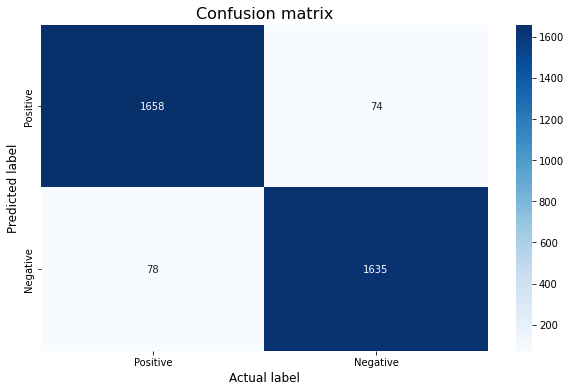

In [108]:
print("Classification Report:\n----------------------\n", cr)

cm = confusion_matrix(y_test,svm_prediction)


# plot confusion matrix 
plt.figure(figsize=(10,6))
sentiment_classes = [ 'Positive', 'Negative']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

# BEST MODEL SAVING

In [109]:
!pip install joblib
import joblib
joblib.dump(svm, "./svm.joblib")

['./svm.joblib']

In [115]:
from google.colab import files
files.download('svm.joblib') 
#loaded_model = joblib.load("./svm.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [111]:
loaded_model = joblib.load("./svm.joblib")

In [113]:
cumle = "bu ürün berbat hiç beğenmedim iade"
cumle_vector = vectorizer.transform([cumle])
loaded_model.predict(cumle_vector)

array([0])

#OTHER SAVING METHOD

In [119]:
import pickle
# pickling the vectorizer
pickle.dump(vectorizer, open('models/vectorizer.sav', 'wb'))
# pickling the model
pickle.dump(svm, open('models/classifier.sav', 'wb'))

In [120]:
#usage
vectorizer = pickle.load(open('models/vectorizer.sav', 'rb'))
classifier = pickle.load(open('models/classifier.sav', 'rb'))

In [125]:
from google.colab import files
files.download('models/vectorizer.sav')
files.download('models/classifier.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [121]:
cumle1 = "çok iyiymiş tavsiye ederim"
cumle_vector = vectorizer.transform([cumle1])
classifier.predict(cumle_vector)

array([1])

In [124]:
result = ['positive' if lbl == 1 else 'negative' for lbl in classifier.predict(cumle_vector)]
result[0]

'positive'